### Experiment 3 - XGBOOST with SMOTE

#### 1. Importing Libraries 

In [19]:
import sys
sys.path.append('../')

from src.visualization.model_evaluation import plot_confusion_matrix, plot_roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
# Import XGBoost Classifier
from xgboost import XGBClassifier

#### 2. Importing Dataset

In [3]:
# importing the dataset 

data = pd.read_csv('..\\data\\processed\\nba_train_processed.csv')

#### 3. Splitting the dataset

In [4]:


from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set

X = data.drop(['TARGET_5Yrs'], axis = 1)

y = data['TARGET_5Yrs']

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)




#### 4. Implementing and Evaluating the prelim model

In [5]:
# Implementing XGBoost

# Fitting XGBoost to the Training set

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

# Predicting the Test set results

y_pred = xgb.predict(X_test)  

y_pred_prob = xgb.predict_proba(X_test)[:,1]


Text(0.5, 1.0, 'Confusion Matrix for XGBoost Classifier')

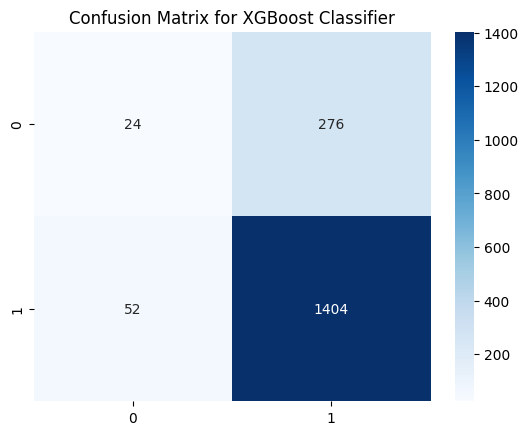

In [6]:
# Plotting the confusion matrix

plot_confusion_matrix(y_test, y_pred, title = "Confusion Matrix for XGBoost Classifier")

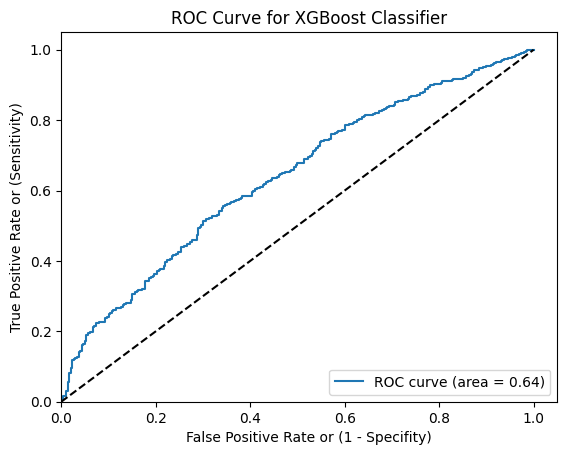

In [7]:
# Plotting the ROC curve

plot_roc_curve(y_test, y_pred_prob , "XGBoost Classifier")

#### 5. Implementing Grid Search on XGBoost

In [8]:
# Implementing GridSearchCV with XGBoost

from sklearn.model_selection import GridSearchCV

# Defining the grid of hyperparameters to search over

param_grid = {'n_estimators': [50, 100, 200],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]}

# Instantiating the GridSearchCV object

xgb_cv = GridSearchCV(xgb, param_grid, cv = 5, scoring='roc_auc')

# Fitting the model on the training data

xgb_cv.fit(X_train, y_train)

# Extracting the best parameters

print("Tuned XGBoost Classifier Parameters: {}".format(xgb_cv.best_params_))

# Extracting the best score

print("Best score is {}".format(xgb_cv.best_score_))


Tuned XGBoost Classifier Parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
Best score is 0.6710980509664186


#### 6. Applying SMOTE

In [9]:
# Since the Dataset is imbalanced, we will use SMOTE to oversample the minority class

In [10]:
# Importing SMOTE

from imblearn.over_sampling import SMOTE

# Instantiating SMOTE

sm = SMOTE(random_state = 2)

# Resampling X_train, y_train

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Fitting XGBoost to the resampled dataset

xgb_smote = XGBClassifier(learning_rate = 0.05, max_depth = 2, n_estimators = 50)

xgb_smote.fit(X_train_res, y_train_res)

# Predicting the Test set results

y_pred_smote = xgb_smote.predict(X_test)

y_pred_prob_smote = xgb_smote.predict_proba(X_test)[:,1]


Text(0.5, 1.0, 'Confusion Matrix for XGBoost Classifier with SMOTE')

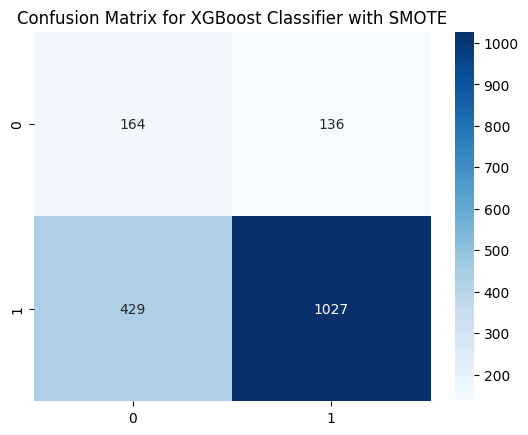

In [11]:
# Plotting the confusion matrix

plot_confusion_matrix(y_test, y_pred_smote, title = "Confusion Matrix for XGBoost Classifier with SMOTE")

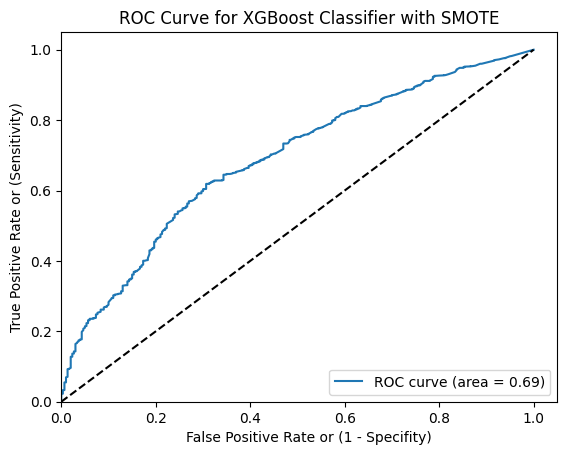

In [12]:
# Plotting the ROC curve

plot_roc_curve(y_test, y_pred_prob_smote , "XGBoost Classifier with SMOTE")

Text(0.5, 1.0, 'Confusion Matrix for XGBoost Classifier with SMOTE')

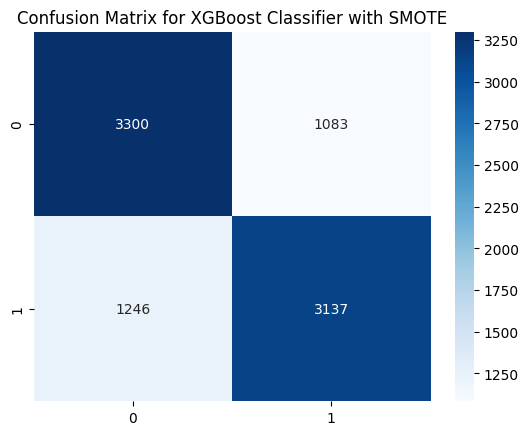

In [13]:
# Confusion Matrix for Train Data 

y_pred_train = xgb_smote.predict(X_train_res)

plot_confusion_matrix(y_train_res, y_pred_train, title = "Confusion Matrix for XGBoost Classifier with SMOTE")

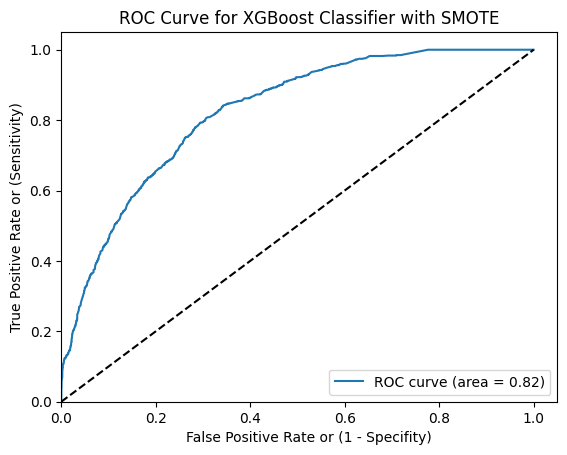

In [14]:
# plot roc curve for train data

y_pred_prob_train = xgb_smote.predict_proba(X_train_res)[:,1]

plot_roc_curve(y_train_res, y_pred_prob_train , "XGBoost Classifier with SMOTE")

#### 7 Applying SMOTE with XGboost and GridSearchCV

In [15]:
# Implementing GridSearchCV with XGBoost and SMOTE

# Defining the grid of hyperparameters to search over
param_grid = {'n_estimators': [50, 100, 200],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]}

# Instantiating the GridSearchCV object

xgb_cv_smote = GridSearchCV(xgb_smote, param_grid, cv = 5, scoring='roc_auc')

# Fitting the model on the training data

xgb_cv_smote.fit(X_train_res, y_train_res)

# Extracting the best parameters

print("Tuned XGBoost Classifier Parameters: {}".format(xgb_cv_smote.best_params_))

# Extracting the best score

print("Best score is {}".format(xgb_cv_smote.best_score_))



Tuned XGBoost Classifier Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score is 0.9467586699848244


In [16]:
# Predicting the Test set results

y_pred_cv_smote = xgb_cv_smote.predict(X_test)

y_pred_prob_cv_smote = xgb_cv_smote.predict_proba(X_test)[:,1]




Text(0.5, 1.0, 'Confusion Matrix for XGBoost Classifier with SMOTE and GridSearchCV')

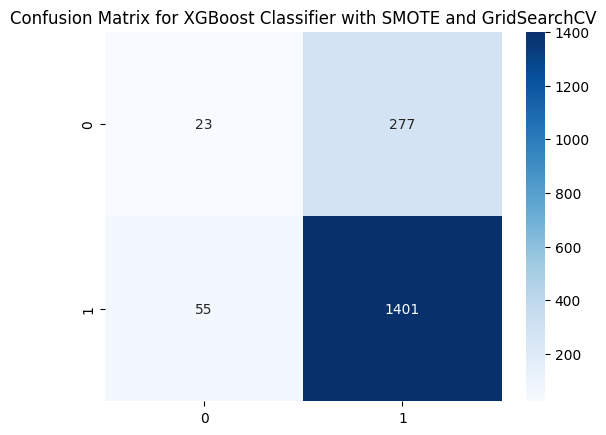

In [17]:
# plot confusion matrix

plot_confusion_matrix(y_test, y_pred_cv_smote, title = "Confusion Matrix for XGBoost Classifier with SMOTE and GridSearchCV")

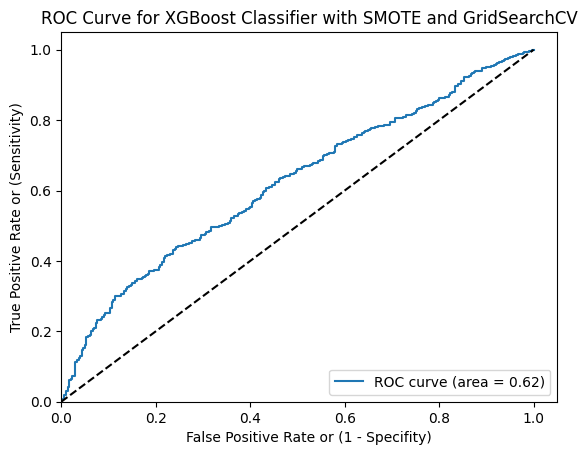

In [18]:
# pLOT ROC CURVE

plot_roc_curve(y_test, y_pred_prob_cv_smote , "XGBoost Classifier with SMOTE and GridSearchCV")

In [ ]:
# plot ROC curve for train data

y_pred_prob_cv_smote_train = xgb_cv_smote.predict_proba(X_train_res)[:,1]

#### Exporting the Final Model

In [20]:
# Exporting the model

pickle.dump(xgb_cv_smote, open('..\\models\\xgb_cv_smote.pkl', 'wb'))

# Predicting the NBA TEST SET

In [21]:
testset = pd.read_csv('..\\data\\raw\\nba_test.csv')

In [24]:
# filtering columns of testset if they are not in the training set

testset = testset[X.columns]

In [25]:
# predicting the test set results

y_pred_test = xgb_cv_smote.predict(testset)

# creating a dataframe with the predictions

y_pred_test = pd.DataFrame(y_pred_test, columns = ['TARGET_5Yrs'])

# create a dataframe combining testset and y_pred_test

submission = pd.concat([testset, y_pred_test], axis = 1)

In [27]:
# Write submission to csv

submission.to_csv('..\\data\\processed\\testset_submission.csv', index = False)